In [2]:
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [2]:
record = []
for i in range(1,100):
    url1='https://www.bukalapak.com/c/komputer/laptop?page='+str(i)+'&search%5Bbrand_seller%5D=0&search%5Bcity%5D=&search%5Bcourier%5D=&search%5Bfree_shipping_coverage%5D=&search%5Binstallment%5D=0&search%5Bnew%5D=1&search%5Bprice_max%5D=&search%5Bprice_min%5D=1000000&search%5Bprovince%5D=&search%5Brating_gte%5D=0&search%5Brating_lte%5D=5&search%5Btodays_deal%5D=0&search%5Btop_seller%5D=0&search%5Bused%5D=1&search%5Bwholesale%5D=0&utf8=%E2%9C%93'
    respon=get(url1)
    soup1=BeautifulSoup(respon.text, 'html.parser')
    laptop=soup1.find_all('li',class_='col-12--2')

    for x in laptop:
        name=x.h3.find('a',class_='product__name line-clamp--2 js-tracker-product-link qa-list').text
        price=x.div.find('span',class_='amount positive').text
        location=x.div.find('span',class_='user-city__txt').text
        feedback=x.div.find('a',class_='user-feedback-summary').text
        data=[name,price,location,feedback]
        record.append(data)

In [3]:
df=pd.DataFrame(record, columns=['Nama Produk','Harga','Lokasi','feedback'])
df.to_excel('datacrawl.xlsx')

In [4]:
#import data
file=pd.read_excel('datacrawl.xlsx')

#cleaning word "feedback " and persen , only take a number of feedback
file1=file['feedback']
#replace "feedback" to space
file1=file1.str.replace("feedback"," ")
#replace "%"to space
file1=file1.str.replace("%"," ")
#replace "(" to space
file1=file1.str.replace("("," ")
#replace ")" to space
file1=file1.str.replace(")"," ")

In [5]:
#split  number of percent and number of feedback
file1=file1.str.split(expand=True,)

#delelte old column feedback owner
del file['feedback']

#adding new column feedback owner
file['feedback'] = file1[1]

#save to exccel
file.to_excel('dataclean.xlsx')

In [6]:
#import data
d=pd.read_excel('dataclean.xlsx')

#take variabel product, price and feedback
product=d['Nama Produk']
price=d['Harga']
feedback=d['feedback']
location=d['Lokasi']

In [7]:
#groupby location
loc_owner = d.groupby('Lokasi').size()
loc_owner1=pd.DataFrame(loc_owner)
loc_owner1.to_excel('gruplokasi.xlsx')

#convert type data string to integer 
price1=price.str.replace(r'.','')
price= price1.astype(int)
d['Harga']=price

In [8]:
#plot price vs feedback
import matplotlib.pyplot as plt
plt.plot(feedback,price ,'ro', label='d')

In [9]:
max(feedback)
max(price)

# Initialize the centroids
#centroid feedback vs price
c1 = (100,20000000)
c2 = (9000,1000000)
c3 = (30000,5000000)
c4 = (50000,50000000)

In [10]:
# points and the centroids

def calculate_distance(centroid, X, Y):
    distances = []
        
    # Unpack the x and y coordinates of the centroid
    c_x, c_y = centroid
        
    # Iterate over the data points and calculate the distance using the           # given formula
    for x, y in list(zip(X, Y)):
        root_diff_x = (x - c_x) ** 2
        root_diff_y = (y - c_y) ** 2
        distance = np.sqrt(root_diff_x + root_diff_y)
        distances.append(distance)
        
    return distances

In [11]:
#calculate distance from 4 centroid
d['c1_distance'] = calculate_distance(c1, feedback, price)
d['c2_distance'] = calculate_distance(c2, feedback, price)
d['c3_distance'] = calculate_distance(c3, feedback, price)
d['c4_distance'] = calculate_distance(c4, feedback, price)

d['Cluster'] = d[['c1_distance', 'c2_distance', 'c3_distance','c4_distance']].apply(np.argmin, axis =1)

#save first k means
d.to_excel('data k means pertama.xlsx')

C:\Users\KillerLeo\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)


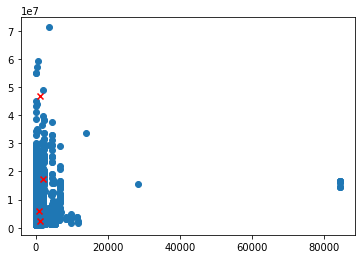

In [12]:
# Calculate the coordinates of the new centroid from cluster 1
feedback_new_centroid1 = d[d['Cluster']=='c1_distance']['feedback'].mean()
price_new_centroid1 = d[d['Cluster']=='c1_distance']['Harga'].mean()

# Calculate the coordinates of the new centroid from cluster 2
feedback_new_centroid2 =  d[d['Cluster']=='c2_distance']['feedback'].mean()
price_new_centroid2 =  d[d['Cluster']=='c2_distance']['Harga'].mean()

# Calculate the coordinates of the new centroid from cluster 3
feedback_new_centroid3 =  d[d['Cluster']=='c3_distance']['feedback'].mean()
price_new_centroid3 =  d[d['Cluster']=='c3_distance']['Harga'].mean()

feedback_new_centroid4 =  d[d['Cluster']=='c4_distance']['feedback'].mean()
price_new_centroid4 =  d[d['Cluster']=='c4_distance']['Harga'].mean()

c1_kedua = (feedback_new_centroid1,price_new_centroid1)
c2_kedua = (feedback_new_centroid2,price_new_centroid2)
c3_kedua = (feedback_new_centroid3,price_new_centroid3)
c4_kedua = (feedback_new_centroid4,price_new_centroid4)

cent_gbg=(c1_kedua,c2_kedua,c3_kedua,c4_kedua)
cent_gbg=pd.DataFrame(list(cent_gbg))


#plot
plt.scatter(feedback , price)   
plt.scatter(cent_gbg[0], cent_gbg[1], c='red', marker='x')

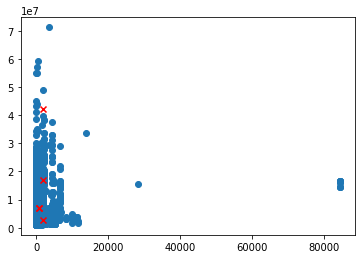

In [13]:
#iterasi kedua
#calculate distance from 4 centroid
d['c1_distance_it2'] = calculate_distance(c1_kedua, feedback, price)
d['c2_distance_it2'] = calculate_distance(c2_kedua, feedback, price)
d['c3_distance_it2'] = calculate_distance(c3_kedua, feedback, price)
d['c4_distance_it2'] = calculate_distance(c4_kedua, feedback, price)

d['Cluster_kedua'] = d[['c1_distance_it2', 'c2_distance_it2', 'c3_distance_it2','c4_distance_it2']].apply(np.argmin, axis =1)
#save second k means
d.to_excel('data k means kedua.xlsx')

# Calculate the coordinates of the new centroid from cluster 1
feedback_new_centroid1_2 = d[d['Cluster_kedua']=='c1_distance_it2']['feedback'].mean()
price_new_centroid1_2 = d[d['Cluster_kedua']=='c1_distance_it2']['Harga'].mean()

# Calculate the coordinates of the new centroid from cluster 2
feedback_new_centroid2_2 = d[d['Cluster_kedua']=='c1_distance_it2']['feedback'].mean()
price_new_centroid2_2 =  d[d['Cluster_kedua']=='c2_distance_it2']['Harga'].mean()

# Calculate the coordinates of the new centroid from cluster 3
feedback_new_centroid3_2 =  d[d['Cluster_kedua']=='c3_distance_it2']['feedback'].mean()
price_new_centroid3_2 =  d[d['Cluster_kedua']=='c3_distance_it2']['Harga'].mean()

feedback_new_centroid4_2 =  d[d['Cluster_kedua']=='c4_distance_it2']['feedback'].mean()
price_new_centroid4_2 =  d[d['Cluster_kedua']=='c4_distance_it2']['Harga'].mean()

c1_ketiga = (feedback_new_centroid1_2,price_new_centroid1_2)
c2_ketiga = (feedback_new_centroid2_2,price_new_centroid2_2)
c3_ketiga = (feedback_new_centroid3_2,price_new_centroid3_2)
c4_ketiga = (feedback_new_centroid4_2,price_new_centroid4_2)

cent_gbg2=(c1_ketiga,c2_ketiga,c3_ketiga,c3_ketiga,c4_ketiga)
cent_gbg2=pd.DataFrame(list(cent_gbg2))

#plot
plt.scatter(feedback, price)   
plt.scatter(cent_gbg2[0], cent_gbg2[1], c='red', marker='x')

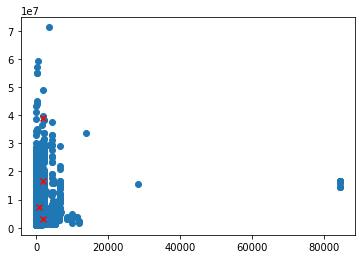

In [14]:
#iterasi ketiga
#calculate distance from 4 centroid
d['c1_distance_it3'] = calculate_distance(c1_ketiga, feedback, price)
d['c2_distance_it3'] = calculate_distance(c2_ketiga, feedback, price)
d['c3_distance_it3'] = calculate_distance(c3_ketiga, feedback, price)
d['c4_distance_it3'] = calculate_distance(c4_ketiga, feedback, price)

d['Cluster_ketiga'] = d[['c1_distance_it3', 'c2_distance_it3', 'c3_distance_it3','c4_distance_it3']].apply(np.argmin, axis =1)
#save second k means
d.to_excel('data k means ketiga.xlsx')

# Calculate the coordinates of the new centroid from cluster 2
feedback_new_centroid1_3 = d[d['Cluster_ketiga']=='c1_distance_it3']['feedback'].mean()
price_new_centroid1_3 = d[d['Cluster_ketiga']=='c1_distance_it3']['Harga'].mean()

# Calculate the coordinates of the new centroid from cluster 2
feedback_new_centroid2_3 = d[d['Cluster_ketiga']=='c1_distance_it3']['feedback'].mean()
price_new_centroid2_3 =  d[d['Cluster_ketiga']=='c2_distance_it3']['Harga'].mean()

# Calculate the coordinates of the new centroid from cluster 3
feedback_new_centroid3_3 =  d[d['Cluster_ketiga']=='c3_distance_it3']['feedback'].mean()
price_new_centroid3_3 =  d[d['Cluster_ketiga']=='c3_distance_it3']['Harga'].mean()

feedback_new_centroid4_3 =  d[d['Cluster_ketiga']=='c4_distance_it3']['feedback'].mean()
price_new_centroid4_3 =  d[d['Cluster_ketiga']=='c4_distance_it3']['Harga'].mean()

c1_ketiga = (feedback_new_centroid1_3,price_new_centroid1_3)
c2_ketiga = (feedback_new_centroid2_3,price_new_centroid2_3)
c3_ketiga = (feedback_new_centroid3_3,price_new_centroid3_3)
c4_ketiga = (feedback_new_centroid4_3,price_new_centroid4_3)

cent_gbg3=(c1_ketiga,c2_ketiga,c3_ketiga,c4_ketiga)
cent_gbg3=pd.DataFrame(list(cent_gbg3))

#plot
plt.scatter(feedback, price)   
plt.scatter(cent_gbg3[0], cent_gbg3[1], c='red', marker='x')

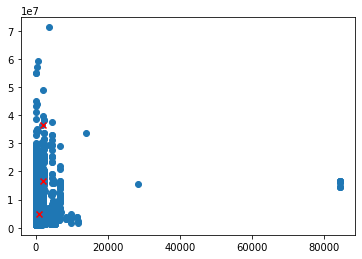

In [15]:
#kesimpulan
#calculate distance from 4 centroid
d['c1_distance_it3'] = calculate_distance(c1_ketiga, feedback, price)
d['c3_distance_it3'] = calculate_distance(c3_ketiga, feedback, price)
d['c4_distance_it3'] = calculate_distance(c4_ketiga, feedback, price)

d['Cluster_ketiga'] = d[['c1_distance_it3', 'c3_distance_it3','c4_distance_it3']].apply(np.argmin, axis =1)
#save second k means
d.to_excel('data k means akhir.xlsx')

# Calculate the coordinates of the new centroid from cluster 2
feedback_new_centroid1_3 = d[d['Cluster_ketiga']=='c1_distance_it3']['feedback'].mean()
price_new_centroid1_3 = d[d['Cluster_ketiga']=='c1_distance_it3']['Harga'].mean()

# Calculate the coordinates of the new centroid from cluster 3
feedback_new_centroid3_3 =  d[d['Cluster_ketiga']=='c3_distance_it3']['feedback'].mean()
price_new_centroid3_3 =  d[d['Cluster_ketiga']=='c3_distance_it3']['Harga'].mean()

feedback_new_centroid4_3 =  d[d['Cluster_ketiga']=='c4_distance_it3']['feedback'].mean()
price_new_centroid4_3 =  d[d['Cluster_ketiga']=='c4_distance_it3']['Harga'].mean()

c1_ketiga = (feedback_new_centroid1_3,price_new_centroid1_3)
c3_ketiga = (feedback_new_centroid3_3,price_new_centroid3_3)
c4_ketiga = (feedback_new_centroid4_3,price_new_centroid4_3)

cent_gbg3=(c1_ketiga,c3_ketiga,c4_ketiga)
cent_gbg3=pd.DataFrame(list(cent_gbg3))

#plot
plt.scatter(feedback, price)   
plt.scatter(cent_gbg3[0], cent_gbg3[1], c='red', marker='x')

In [17]:
akhir=pd.read_excel('data k means akhir.xlsx')
data=akhir[['Nama Produk','Cluster_ketiga']]
data1=data['Cluster_ketiga']
data1=data1.str.replace("c4_distance_it3","Kelompok 3")
data1=data1.str.replace("c3_distance_it3","Kelompok 2")
data1=data1.str.replace("c1_distance_it3","Kelompok 1")
del data['Cluster_ketiga']
data['feedback'] = data1

C:\Users\KillerLeo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
subs = ["HP","hp","Hp","DELL","Dell","dell","LENOVO","Lenovo","lenovo","ASUS","Asus","asus","ACER","acer","Acer","Mac","mac" ,"MAC","Toshiba","toshiba","TOSHIBA","Dell"]
data["Merek"]="Undifined/Other Brand" 
panjang1=data.shape
ukuran1=panjang1[0]
ukuran1
merek1 = data["Merek"]
produk1 = data["Nama Produk"]
branded = []
for i in range(ukuran1 - 1):
    for sub in subs:
        string = produk1.iloc[i]
        brand = merek1.iloc[i]
        periksa = string.count(sub)
        if periksa >=1:
            brand1 = brand.replace("Undifined/Other Brand",sub)
            data.set_value(i,'Merek',brand1)

mereklama=data['Merek']
merekbaru = mereklama.str.upper()            
data['Merek']=merekbaru
data

C:\Users\KillerLeo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\KillerLeo\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\Users\KillerLeo\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Nama Produk,feedback,Merek
0,Xiaomi Mi Gaming Laptop i5 GTX 1050Ti 8GB 128G...,Kelompok 3,UNDIFINED/OTHER BRAND
1,Laptop Lenovo Ideapad 330-14AST AMD A9-9425 4G...,Kelompok 3,LENOVO
2,Notebook Air XIAO MI 133 Inch Windows 10,Kelompok 1,UNDIFINED/OTHER BRAND
3,Xiaomi Mi Notebook Air 12.5 Inch Windows 10,Kelompok 2,UNDIFINED/OTHER BRAND
4,Jual Laptop HP Elitebook 8470 Core i5 Gen3 Mur...,Kelompok 2,HP
5,Acer Aspire 514-51G-74VX with Intel i7 8th Gen...,Kelompok 2,ACER
6,Laptop Asus ROG GL553 Core i7 RAM 16GB SSD 256...,Kelompok 1,ASUS
7,Laptop Asus TUF Gaming FX504GE Core i7 Gen 8 R...,Kelompok 1,ASUS
8,Acer Swift 3 Core i7 RAM 8GB SSD 512GB VGA 2GB...,Kelompok 1,ACER
9,Alienware 17 R4 Core i7 Gen 7 RAM 16GB HDD 1TB...,Kelompok 1,UNDIFINED/OTHER BRAND


In [26]:
klp1 = data.groupby('feedback')
cluster1 = klp1.get_group('Kelompok 1').reset_index()
klp2 = data.groupby('feedback')
cluster2 = klp2.get_group('Kelompok 2').reset_index()
klp3 = data.groupby('feedback')
cluster3 = klp3.get_group('Kelompok 3').reset_index()

In [30]:
kel1= cluster1.groupby('Merek').size()
kelompok1 = pd.DataFrame(kel1)
kelompok1.to_excel('kelompok1.xlsx')
kel2= cluster2.groupby('Merek').size()
kelompok2 = pd.DataFrame(kel2)
kelompok2.to_excel('kelompok2.xlsx')
kel3= cluster3.groupby('Merek').size()
kelompok3 = pd.DataFrame(kel3)
kelompok3.to_excel('kelompok3.xlsx')

kelompok1=pd.read_excel('kelompok1.xlsx')
kelompok2=pd.read_excel('kelompok2.xlsx')
kelompok3=pd.read_excel('kelompok3.xlsx')
kelompok1.columns=['Merek','frekuensi']
kelompok2.columns=['Merek','frekuensi']
kelompok3.columns=['Merek','frekuensi']

In [31]:
totalklp1=kelompok1['frekuensi'].aggregate(['sum'])
totalklp2=kelompok2['frekuensi'].aggregate(['sum'])
totalklp3=kelompok3['frekuensi'].aggregate(['sum'])
ukuranklp1=kelompok1.shape
ukuranklp1=ukuranklp1[0]
ukuranklp2=kelompok2.shape
ukuranklp2=ukuranklp2[0]
ukuranklp3=kelompok3.shape
ukuranklp3=ukuranklp3[0]
presentaseklp1=[]
for bilangan in kelompok1['frekuensi']:
    bilangangklp1 = bilangan / ukuranklp1
    presentaseklp1.append(bilangangklp1)
presentaseklp2=[]
for bilangan in kelompok2['frekuensi']:
    bilangangklp2 = bilangan / ukuranklp2
    presentaseklp2.append(bilangangklp2)
presentaseklp3=[]
for bilangan in kelompok3['frekuensi']:
    bilangangklp3 = bilangan / ukuranklp3
    presentaseklp3.append(bilangangklp3)
    
labelsklp1=[]
for label in kelompok1['Merek']:
    labelsklp1.append(label) 
labelsklp2=[]
for label in kelompok2['Merek']:
    labelsklp2.append(label) 
labelsklp3=[]
for label in kelompok3['Merek']:
    labelsklp3.append(label)     
    

In [1]:
#plot
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}, {'type':'domain'},{'type':'domain'}]])
fig.add_trace(go.Pie(labels=labelsklp1, values=presentaseklp1, name="Kelompok1"),
              1, 1)
fig.add_trace(go.Pie(labels=labelsklp2, values=presentaseklp2, name="Kelompok2"),
              1, 2)
fig.add_trace(go.Pie(labels=labelsklp3, values=presentaseklp3, name="Kelompok3"),
              1, 3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.5, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Perbandingan Penjualan di Jakarta Pusat dan Surabaya",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Kelompok1', x=0.12, y=0.5, font_size=20, showarrow=False),
                 dict(text='Kelompok2', x=0.45, y=0.5, font_size=20, showarrow=False),
                dict(text='Kelompok3', x=0.85, y=0.5, font_size=20, showarrow=False)])
fig.show()

NameError: name 'labelsklp1' is not defined

In [ ]:
pip install pandas